# Getting Started with pandas

pandas will be the primary library of interest throughout much of the rest of the book.
It contains high-level data structures and manipulation tools designed to make data
analysis fast and easy in Python. pandas is built on top of NumPy and makes it easy to
use in NumPy-centric applications.

As a bit of background, I started building pandas in early 2008 during my tenure at
AQR, a quantitative investment management firm. At the time, I had a distinct set of
requirements that were not well-addressed by any single tool at my disposal:
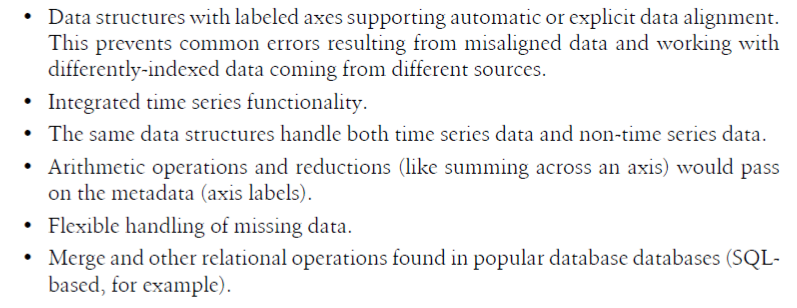

I wanted to be able to do all of these things in one place, preferably in a language wellsuited
to general purpose software development. Python was a good candidate language
for this, but at that time there was not an integrated set of data structures and
tools providing this functionality.
Over the last four years, pandas has matured into a quite large library capable of solving
a much broader set of data handling problems than I ever anticipated, but it has expanded
in its scope without compromising the simplicity and ease-of-use that I desired
from the very beginning. I hope that after reading this book, you will find it to be just
as much of an indispensable tool as I do.

In [2]:
import pandas as pd

Series and DataFrame are used so much that I find it easier to import them into the local namespace.

In [3]:
from pandas import Series, DataFrame

In [4]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Introduction to pandas Data Structures

### Series

A Series is a one-dimensional array-like object containing an array of data (of any
NumPy data type) and an associated array of data labels, called its index. The simplest
Series is formed from only an array of data:

In [5]:
obj = pd.Series([4, 7, -5, 3])
obj

# following is the string representation of the series in IPython

0    4
1    7
2   -5
3    3
dtype: int64

The string representation of a Series displayed interactively shows the index on the left
and the values on the right. Since we did not specify an index for the data, a default
one consisting of the integers 0 through N - 1 (where N is the length of the data) is
created. You can get the array representation and index object of the Series via its values
and index attributes, respectively:

In [6]:
print(obj.values)
print(obj.index)  # like range(4)

[ 4  7 -5  3]
RangeIndex(start=0, stop=4, step=1)


Often it will be desirable to create a Series with an index identifying each data point:

In [7]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print(obj2)
print(obj2.index)

d    4
b    7
a   -5
c    3
dtype: int64
Index(['d', 'b', 'a', 'c'], dtype='object')


In [8]:
#  same as like in numPy elem can be accessed with index ,but notice that in series we have 'string or char' indexing but in
#  in numpy we have integer indexing only
print(obj2['a'])
obj2['d'] = 6
obj2[['c', 'a', 'd']]

-5


c    3
a   -5
d    6
dtype: int64

In [9]:
'''
NumPy array operations, such as filtering with a boolean array, scalar multiplication,
or applying math functions, will preserve the index-value link:
'''
obj2[obj2 > 0]
obj2 * 2
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Another way to think about a Series is as a fixed-length, ordered dict, as it is a mapping
of index values to data values. It can be substituted into many functions that expect a
dict

In [10]:
print('b' in obj2)
print('e' in obj2)

True
False


Should you have data contained in a Python dict, you can create a Series from it by
passing the dict


In [11]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


And When only passing a dict, the index in the resulting Series will have the dict’s keys in
sorted order, as clearly observable in below example

In [12]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In this case, 3 values found in sdata were placed in the appropriate locations, but since
no value for 'California' was found, it appears as NaN (not a number) which is considered
in pandas to mark missing or NA values. I will use the terms “missing” or “NA”
to refer to missing data. The isnull and notnull functions in pandas should be used to
detect missing data

In [13]:
print(pd.isnull(obj4))
print()
print(pd.notnull(obj4))

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool


In [14]:
#  this also works
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

A critical Series feature for many applications is that it automatically aligns differentlyindexed
data in arithmetic operations

In [15]:
obj3
obj4
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Both the Series object itself and its index have a name attribute, which integrates with
other key areas of pandas functionality

In [16]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

A Series’s index can be altered in place by assignment, like obj's index is changed to different name rather than 

In [17]:
obj
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

A DataFrame represents a tabular, spreadsheet-like data structure containing an ordered
collection of columns, each of which can be a different value type (numeric,
string, boolean, etc.). The DataFrame has both a row and column index; it can be
thought of as a dict of Series (one for all sharing the same index). Compared with other
such DataFrame-like structures you may have used before (like R’s data.frame), roworiented
and column-oriented operations in DataFrame are treated roughly symmetrically.
Under the hood, the data is stored as one or more two-dimensional blocks rather
than a list, dict, or some other collection of one-dimensional arrays. The exact details
of DataFrame’s internals are far outside the scope of this book.

### Ways to construct dataframe 
There are numerous ways to construct a DataFrame, though one of the most common
is from a dict of equal-length lists or NumPy arrays

In [18]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

The resulting DataFrame will have its index assigned automatically as with Series, and
the columns are placed in sequential order as described in its making

In [19]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [20]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [21]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])
# acessing the dataframe with specific order of the columns name

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [22]:
# As with Series, if you pass a column that isn’t contained in data, it will appear with NA
# values in the result:

frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
print(frame2)
frame2.columns

       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN


Index(['year', 'state', 'pop', 'debt'], dtype='object')

A column in a DataFrame can be retrieved as a Series either by dict-like notation or by attribute

In [23]:
print(frame2['state'])
print(frame2.year)

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object
one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64


Note that the returned Series have the same index as the DataFrame, and their name
attribute has been appropriately set.

Rows can also be retrieved by position or name by a couple of methods, such as the
loc indexing field (much more on this later):

In [24]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [25]:
frame2['debt'] = 16.5
frame2


,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [26]:
frame2['debt'] = np.arange(6.0)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


When assigning lists or arrays to a column, the value’s length must match the length
of the DataFrame. If you assign a Series, it will be instead conformed exactly to the
DataFrame’s index, inserting missing values in any holes:

In [27]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Assigning a column that doesn’t exist will create a new column. The del keyword will
delete columns as with a dict

In [28]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [29]:
del frame2['eastern']
print(frame2.columns)
frame2

Index(['year', 'state', 'pop', 'debt'], dtype='object')


,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


The column returned when indexing a DataFrame is a view on the underlying
data, not a copy. Thus, any in-place modifications to the Series
will be reflected in the DataFrame. The column can be explicitly copied
using the Series’s copy method.

### ANother way of forming data is
Another common form of data is a nested dict of dicts format:

In [30]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [31]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [32]:
# And above table can be transformed with help of attribute T, to more familiar representation
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [33]:
# pd.DataFrame(pop, index=[2001, 2002, 2003])

# This generated error 

In [34]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


In [35]:
# If a DataFrame’s index and columns have their name attributes set, these will also be
# displayed:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [36]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [37]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

### Different possible data input to dataframe constructor

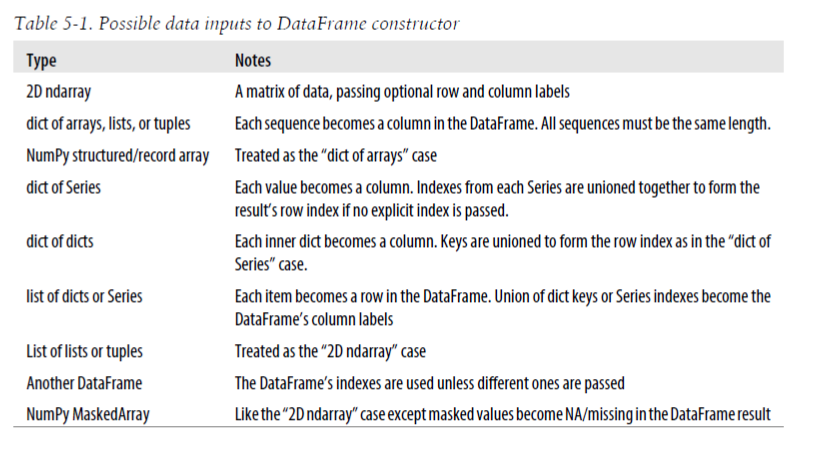

### Index Objects

pandas’s Index objects are responsible for holding the axis labels and other metadata
(like the axis name or names). Any array or other sequence of labels used when constructing
a Series or DataFrame is internally converted to an Index

In [40]:
obj = Series(range(3), index=['a', 'b', 'c']) # this creates a series with data as 0,1,2 and indexes as mentioned
print(obj)
index = obj.index # making a variable which now contains the indexes of Series obj
index

a    0
b    1
c    2
dtype: int64


Index(['a', 'b', 'c'], dtype='object')

Index objects are immutable and thus can’t be modified by the user

index[1] = 'd'  # TypeError

Immutability is important so that Index objects can be safely shared among data
structures

In [43]:
labels = pd.Index(np.arange(3))
# labels =np.arange(3) this would create np array but series.index need to be of type Index, thus obj2.index is labels would give false
print(labels)
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
print(obj2)
obj2.index is labels

Int64Index([0, 1, 2], dtype='int64')
0    1.5
1   -2.5
2    0.0
dtype: float64


True

In [45]:
frame3
frame3.columns
print('Ohio' in frame3.columns)
print(2003 in frame3.index)

True
False


In addition to being array-like, an Index also functions as a fixed-size set

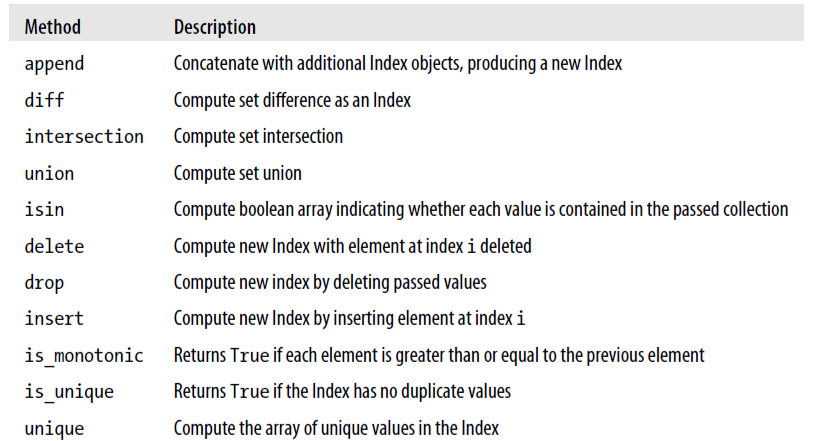

In [49]:
# u can see that dup_labels is index object of pandas
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
print(dup_labels)
print(type(dup_labels))

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


## Essential Functionality

### Reindexing

A critical method on pandas objects is reindex, which means to create a new object
with the data conformed to a new index. Consider a simple example from above:

In [50]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

Calling reindex on this Series rearranges the data according to the new index, introducing
missing values if any index values were not already present

In [53]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
print(obj2)

obj3=obj.reindex(['a','b','c','d','e'],fill_value=0) # here we are specifying that donot put Nan for non indexed value ,put 0
print()
print(obj3)

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64


For ordered data like time series, it may be desirable to do some interpolation or filling
of values when reindexing. The method option allows us to do this, using a method such
as ffill which forward fills the values

In [54]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

With DataFrame, reindex can alter either the (row) index, columns, or both. When
passed just a sequence, the rows are reindexed in the result:

In [58]:
# one major take away is that row serve as indexes and column name are different things 
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
print('frame is \n\n\n',frame)
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

frame is 


    Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8


,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [59]:
# You can easily see that reindexing can change the column names too and Put NaN and drop other columns accordingly
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [60]:
# frame.loc[['a', 'b', 'c', 'd'], states] unclear

C:\Users\saurabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


### Dropping Entries from an Axis

Dropping one or more entries from an axis is easy if you have an index array or list
without those entries. As that can require a bit of munging and set logic, the drop
method will return a new object with the indicated value or values deleted from an axis

In [63]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj
new_obj = obj.drop('c')
print(new_obj)
print()
print(obj.drop(['d', 'c']))

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

a    0.0
b    1.0
e    4.0
dtype: float64


In [64]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [65]:
data.drop(['Colorado', 'Ohio']) # by default axis =0

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [68]:
data.drop('two', axis=1) # specified that axis is 1 that is column axis
data.drop(['two', 'four'],axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [69]:
# inplace droping the data 
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### Indexing, Selection, and Filtering


Series indexing (obj[...]) works analogously to NumPy array indexing, except you can
use the Series’s index values instead of only integers

In [70]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj
# acessing with series index
print(obj['b'])
# acciessing with array indexing
print(obj[1])
print(obj[2:4]) # slicing 
print(obj[['b', 'a', 'd']])
print(obj[[1, 3]])
print(obj[obj < 2])

1.0
1.0
c    2.0
d    3.0
dtype: float64
b    1.0
a    0.0
d    3.0
dtype: float64
b    1.0
d    3.0
dtype: float64
a    0.0
b    1.0
dtype: float64


Slicing with labels behaves differently than normal Python slicing in that the endpoint is inclusive

We are doing slicing on the basis of indexing

In [71]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [72]:
obj['b':'c'] = 5 # again remember that slicing creates a view and that would affect the real table too
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [73]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
print(data)
print()
print(data['two'])
print()
print(data[['three', 'one']])

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

          three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12


In [74]:
print(data[:2])
print()
print(data[data['three'] > 5])

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7

          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


Pretty as same as nparray

In [75]:
data < 5
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### Selection with loc and iloc

For DataFrame label-indexing on the rows, I introduce the special indexing field iloc. It
enables you to select a subset of the rows and columns from a DataFrame with NumPylike
notation plus axis labels. As I mentioned earlier, this is also a less verbose way to
do reindexing:

## Rember that 
Iloc is used when accessing the elements via numerical index
loc is used when accessing the elements via value indexing

In [84]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [77]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [78]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [79]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [87]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [88]:
# this can be understood like this- we get boolean array with data.three > 5 and these act as filter for rows of data.iloc[:,:3] 
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


### Integer Indexes

ser = pd.Series(np.arange(3.))
ser
ser[-1]

In [90]:
ser = pd.Series(np.arange(3.))

In [91]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [94]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
print(ser2[-1])
print(ser2)

2.0
a    0.0
b    1.0
c    2.0
dtype: float64


In [98]:
print(ser[:1])
print(ser.loc[:1])
print(ser.iloc[:1])

0    0.0
dtype: float64
0    0.0
1    1.0
dtype: float64
0    0.0
dtype: float64


### Arithmetic and Data Alignment

In [99]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
print(s1)
print(s2)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


In [100]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [104]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [105]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [106]:
# we got NaN on those elements which were not present in either of the array, and sum in those which were present in both
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [107]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df1
df2
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


#### Arithmetic methods with fill values

In [108]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [109]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [110]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


Now fill values can be used, to avoid appearance of NaN in result

How it achieve this

This is achieved by making values =0 if elem are not present in other array and then addition would be values in either of the cells

In [111]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [112]:
print(1 / df1)
# or above code can be written as
df1.rdiv(1)

          a         b         c         d
0       inf  1.000000  0.500000  0.333333
1  0.250000  0.200000  0.166667  0.142857
2  0.125000  0.111111  0.100000  0.090909


,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250000,0.200000,0.166667,0.142857
2,0.125000,0.111111,0.100000,0.090909


In [113]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


#### Operations between DataFrame and Series

As with NumPy arrays, arithmetic between DataFrame and Series is well-defined. First,
as a motivating example, consider the difference between a 2D array and one of its rows

In [115]:
arr = np.arange(12.).reshape((3, 4))
arr
print(arr)
print()
print(arr[0])
arr - arr[0]

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]

[0. 1. 2. 3.]


array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

This is referred to as broadcasting and is explained in more detail in Chapter 12. Operations between a DataFrame and a Series are similar

In [117]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
print(frame)
print(series)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64


In [118]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


Addition of a series and frame

In [122]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
print('series \n',series2)
print(frame)
frame + series2

series 
 b    0
e    1
f    2
dtype: int64
          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0


,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [124]:
series3 = frame['d']
print(frame)
print(series3)
frame.sub(series3, axis='index')

# what is being achieved is that - we are subtracting each columns of frame with series3

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64


,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### Function Application and Mapping

In [125]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame
np.abs(frame)

,b,d,e
Utah,0.204708,0.478943,0.519439
Ohio,0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,1.296221


Another frequent operation is applying a function on 1D arrays to each column or row.
DataFrame’s apply method does exactly this

In [126]:
f = lambda x: x.max() - x.min()
frame.apply(f) # by default it is across axis=row, which means min() and max() would be computed from all rows and for each and 
# every column

b    1.802165
d    1.684034
e    2.689627
dtype: float64

In [127]:
frame.apply(f, axis='columns')

Utah      0.998382
Ohio      2.521511
Texas     0.676115
Oregon    2.542656
dtype: float64

Many of the most common array statistics (like sum and mean) are DataFrame methods, so using apply is not necessary

In [129]:
print(frame)
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f) # by default each row would be analysed for each and every column 

               b         d         e
Utah   -0.204708  0.478943 -0.519439
Ohio   -0.555730  1.965781  1.393406
Texas   0.092908  0.281746  0.769023
Oregon  1.246435  1.007189 -1.296221


,b,d,e
min,-0.555730,0.281746,-1.296221
max,1.246435,1.965781,1.393406


Element-wise Python functions can be used, too. Suppose you wanted to compute a
formatted string from each floating point value in frame. You can do this with applymap

In [130]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.20,0.48,-0.52
Ohio,-0.56,1.97,1.39
Texas,0.09,0.28,0.77
Oregon,1.25,1.01,-1.30


In [131]:
frame['e'].map(format)

Utah      -0.52
Ohio       1.39
Texas      0.77
Oregon    -1.30
Name: e, dtype: object

### Sorting and Ranking

Sorting a data set by some criterion is another important built-in operation. To sort
lexicographically by row or column index, use the sort_index method, which returns
a new, sorted object

In [135]:
# it is cool isn't it
obj = pd.Series(range(4), index=['ab', 'aa', 'ad', 'ac'])
obj.sort_index()

aa    1
ab    0
ac    3
ad    2
dtype: int64

In [137]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
print(frame.sort_index())
print('when sorted across axis=1 ,we can say that columns are sorted in lexical order and row order remain the same ')
frame.sort_index(axis=1)

       d  a  b  c
one    4  5  6  7
three  0  1  2  3
when sorted across axis=1 ,we can say that columns are sorted in lexical order and row order remain the same 


,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [138]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [139]:
# Sorting a series by its value
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [140]:
# Any missing values are sorted to the end of the Series by default
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [142]:
# On DataFrame, you may want to sort by the values in one or more columns. To do so,
# pass one or more column names to the by option
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
print(frame)
frame.sort_values(by='b') #,ascending=False

   b  a
0  4  0
1  7  1
2 -3  0
3  2  1


,b,a
1,7,1
0,4,0
3,2,1
2,-3,0


In [143]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


Ranking is closely related to sorting, assigning ranks from one through the number of valid data points in an array. It is similar to the indirect sort indices produced by numpy.argsort, except that ties are broken according to a rule. The rank methods for Series and DataFrame are the place to look; by default rank breaks ties by assigning each group the mean rank

In [147]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

# It is clear that -5 is the least number and thus rank is 1 and 0 is least number and rank is 2

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

Ranks can also be assigned according to the order they’re observed in the data

In [145]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [146]:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [149]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
print(frame)
frame.rank(axis='columns')
# now the rank is computed along column

     b  a    c
0  4.3  0 -2.0
1  7.0  1  5.0
2 -3.0  0  8.0
3  2.0  1 -2.5


,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### Axis Indexes with Duplicate Labels

In [150]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [151]:
obj.index.is_unique

False

In [153]:
print(obj['a'])
print(obj['c'])

a    0
a    1
dtype: int64
4


In [155]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
print(df)
df.loc['b']

          0         1         2
a -0.577087  0.124121  0.302614
a  0.523772  0.000940  1.343810
b -0.713544 -0.831154 -2.370232
b -1.860761 -0.860757  0.560145


,0,1,2
b,-0.713544,-0.831154,-2.370232
b,-1.860761,-0.860757,0.560145


## Summarizing and Computing Descriptive Statistics

pandas objects are equipped with a set of common mathematical and statistical methods. Most of these fall into the category of reductions or summary statistics, methods that extract a single value (like the sum or mean) from a Series or a Series of values from the rows or columns of a DataFrame. Compared with the equivalent methods of vanilla NumPy arrays, they are all built from the ground up to exclude missing data. Consider a small DataFrame:

In [156]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [157]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [158]:
# Passing axis=1 sums over the rows instead
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [159]:
# NA values are excluded unless the entire slice (row or column in this case) is NA. This
# can be disabled using the skipna option
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [160]:
# idmax return the index of the maximum element
df.idxmax()

one    b
two    d
dtype: object

In [161]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [162]:
# Another type of method is neither a reduction nor an accumulation. describe is one
# such example, producing multiple summary statistics in one shot
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [164]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
print(obj)
obj.describe()

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object


count     16
unique     3
top        a
freq       8
dtype: object

### Correlation and Covariance

conda install pandas-datareader

In [174]:
price = pd.read_pickle('examples/yahoo_price.pkl')
volume = pd.read_pickle('examples/yahoo_volume.pkl')

print(price.head())
print(volume.head())

print(price.shape)
print(volume.shape)

                 AAPL        GOOG         IBM       MSFT
Date                                                    
2010-01-04  27.990226  313.062468  113.304536  25.884104
2010-01-05  28.038618  311.683844  111.935822  25.892466
2010-01-06  27.592626  303.826685  111.208683  25.733566
2010-01-07  27.541619  296.753749  110.823732  25.465944
2010-01-08  27.724725  300.709808  111.935822  25.641571
                 AAPL      GOOG      IBM      MSFT
Date                                              
2010-01-04  123432400   3927000  6155300  38409100
2010-01-05  150476200   6031900  6841400  49749600
2010-01-06  138040000   7987100  5605300  58182400
2010-01-07  119282800  12876600  5840600  50559700
2010-01-08  111902700   9483900  4197200  51197400
(1714, 4)
(1714, 4)


import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

In [166]:
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,-0.000680,0.001837,0.002072,-0.003483
2016-10-18,-0.000681,0.019616,-0.026168,0.007690
2016-10-19,-0.002979,0.007846,0.003583,-0.002255
2016-10-20,-0.000512,-0.005652,0.001719,-0.004867
2016-10-21,-0.003930,0.003011,-0.012474,0.042096


In [175]:
print(returns['MSFT'].corr(returns['IBM'])) # calculating corr between MSFT and IBM
returns['MSFT'].cov(returns['IBM']) # calculating covariance between MSFT and IBM

0.4997636114415114


8.870655479703546e-05

In [168]:
# another way of writting syntax for MSFT and IBM corr
returns.MSFT.corr(returns.IBM)

0.4997636114415114

In [176]:
print(returns.corr()) #returning the corr matrix 
returns.cov() # returning the covariance matrix

          AAPL      GOOG       IBM      MSFT
AAPL  1.000000  0.407919  0.386817  0.389695
GOOG  0.407919  1.000000  0.405099  0.465919
IBM   0.386817  0.405099  1.000000  0.499764
MSFT  0.389695  0.465919  0.499764  1.000000


,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000251,0.000078,0.000108
IBM,0.000078,0.000078,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


Using DataFrame’s corrwith method, you can compute pairwise correlations between
a DataFrame’s columns or rows with another Series or DataFrame. Passing a Series
returns a Series with the correlation value computed for each column

In [170]:
returns.corrwith(returns.IBM)

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

Passing a DataFrame computes the correlations of matching column names. Here I compute correlations of percent changes with volume

In [171]:
returns.corrwith(volume)

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

Passing axis=1 does things row-wise instead. In all cases, the data points are aligned by
label before computing the correlation

### Unique Values, Value Counts, and Membership

In [178]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [179]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [180]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [181]:
pd.value_counts(obj.values, sort=False)

c    3
d    1
a    3
b    2
dtype: int64

Lastly, isin is responsible for vectorized set membership and can be very useful in
filtering a data set down to a subset of values in a Series or column in a DataFrame

In [183]:
obj
mask = obj.isin(['b', 'c'])
print(mask)
obj[mask]

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool


0    c
5    b
6    b
7    c
8    c
dtype: object

In [184]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

In some cases, you may want to compute a histogram on multiple related columns in
a DataFrame. Here’s an example:

In [185]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [186]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [187]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Filling in Missing Data

## Hierarchical Indexing

Page no 163 of pdf

## Reordering and Sorting Levels

## Integer Indexing

## Conclusion